Creating RawArray with float64 data, n_channels=2, n_times=1000
    Range : 0 ... 999 =      0.000 ...     9.990 secs
Ready.


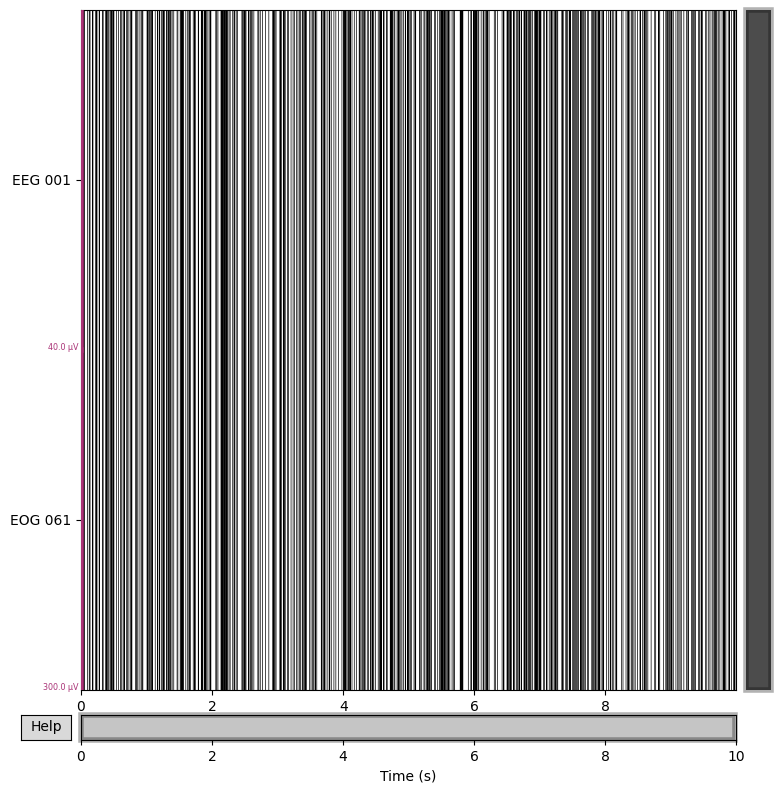

Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 331 samples (3.310 sec)

Using EOG channel: EOG 061
EOG channel index for this subject is: [1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/kibble/Documents/School/Brain Powered/Brain-Powered-2022-2023/_code/classifiers.py:23: RuntimeWarning: filter_length (1024) is longer than the signal (1000), distortion is likely. Reduce filter length or filter a longer signal.
  eog_events, _ = mne.preprocessing.find_eog_events(raw, ch_name=ch_name, event_id=event_id)
/home/kibble/Documents/School/Brain Powered/Brain-Powered-2022-2023/_code/classifiers.py:23: RuntimeWarning: filter_length (1024) is longer than the signal (1000), distortion is likely. Reduce filter length or filter a longer signal.
  eog_events, _ = mne.preprocessing.find_eog_events(raw, ch_name=ch_name, event_id=event_id)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out

In [3]:
import APPEND_TO_PATH
from _code.classifiers import detect_eog_events

import numpy as np
import time
import mne

def simulate_eeg_with_eyeblinks(n_samples=1000, sfreq=100., sigma=0.1):
    '''
    n_samples : int
        Number of samples to include in the simulation
    sfreq : float
        Sampling frequency
    sigma : float
        Standard deviation of the noise to add to the simulated data
    '''

    # Define the information for the simulation
    info = mne.create_info(ch_names=['EEG 001', 'EOG 061'], ch_types=['eeg', 'eog'], sfreq=sfreq)

    # Create a periodic signal to simulate eyeblinks in the EOG channel
    blink_rate = 1. / 3.  # One blink every three seconds
    time = np.arange(n_samples) / sfreq  # Time array
    blink_data = np.sin(2. * np.pi * blink_rate * time)  # Simulated eyeblink data

    # Create some random EEG data
    eeg_data = np.random.normal(scale=sigma, size=time.shape)  # Simulated EEG data

    # Stack the EEG and EOG data
    data = np.vstack([eeg_data, blink_data])

    # Create the Raw object
    raw = mne.io.RawArray(data, info)

    return raw

# Usage
raw = simulate_eeg_with_eyeblinks()
raw.plot()
eog_events = detect_eog_events(raw)
print(f"Detected {len(eog_events)} EOG events.")



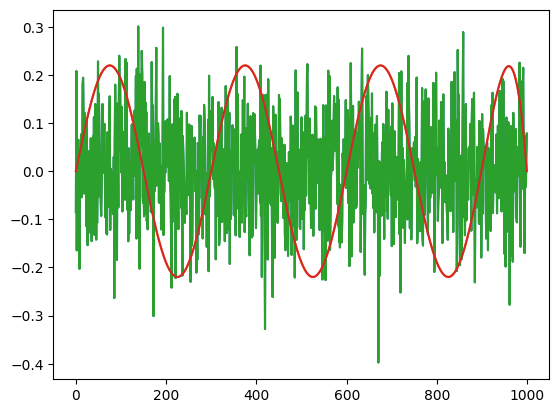

In [8]:
import matplotlib.pyplot as plt
raw.get_data().shape

ch1, ch2 = raw.get_data()

plt.plot(ch1)
plt.plot(ch2)
plt.show()